In [10]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, '../analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/'

In [15]:
pair_types = ['cosmic' ,'CC 1p 0pi'    ]
labels     = ['cosmic data' ,'CC 1p 0$\\pi$ simulation']
colors     = ['red'    ,'blue'         ]
cmaps      = ['Reds'   ,'Blues'        ]

In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [5]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)
soft Pmiss,16.3%,95.4%,37.3%,70.7%,$p_{miss}<0.30$ GeV/c,16.3% (621),0.7% (29),0.0% (1),37.3% (460)
tight Pt,9.3%,95.7%,22.4%,74.9%,$p_{t}<0.15$ GeV/c,9.3% (354),0.4% (16),0.0% (0),22.4% (277)


In [59]:
#---------------------------------------------------------------------------------------------
# Aug-1, 2017
def plot_feature_pairs(cut_name='${PID}_a$',
                       var='l_long',x_label='$l_{long}$ [cm]',mul=1,                                
                       bins=np.linspace(0,300,50),
                       figsize=(12,8),legend_fontsize=25,fontsize=25,
                       do_add_legend=False,legend_loc='upper center', 
                       ticks_color='black'):
    fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    text_colors=[]
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        if len(sample) < 10: continue
        h,bins,_=plt.hist(mul*sample[var],normed=1,bins=bins,histtype='step',linewidth=3,color=color)
        text_colors.append(color)
        p = plt.plot([0,0],[0,0], label=label,linestyle='-',linewidth=6,color=color)
        if np.max(h)>max_h:
            max_h=np.max(h)
        
    if do_add_legend:
        leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc)
        for text_color,text in zip(text_colors,leg.get_texts()):
            text.set_color(text_color)

    set_axes(ax,x_label=x_label,y_label='normalized counts [a.u.]',fontsize=fontsize,ticks_color=ticks_color,do_add_grid=True)
    ax.set_xlim(np.min(bins),np.max(bins))
    ax.set_ylim(0,1.05*max_h)
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
#     ax.yaxis.set_major_formatter(ticker.NullFormatter())
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------


#---------------------------------------------------------------------------------------------
# July-11, 2017
def plot_cut_samples (reduced_cut_name='${PID}_A$',
                      cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of sample',
                      xcenter=0,figsize=(12,8),fontsize=25,markers_size=30,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, legend_loc='bbox',legend_fontsize=25,
                      ticks_color='black'):
    fig,ax=plt.subplots(figsize=figsize)
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
        sample = reduced_MCbnbDATAcosmicSamples[reduced_cut_name][pair_type]
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_err = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_err = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_err , xerr=0, fmt='o' , markersize=markers_size , label=label, color=color)
    if do_add_legend: 
        if 'bbox' not in legend_loc:
            leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc,markerscale=2.)
        else:
            leg=ax.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.,fontsize=legend_fontsize,markerscale=2.)
        for color,text in zip(colors,leg.get_texts()):
            text.set_color(color)
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,ticks_color=ticks_color,xticks=np.linspace(xmin,xmax,7),yticks=[25,50,75,100],do_add_grid=True)
    plt.tight_layout()
    return ax,leg
#---------------------------------------------------------------------------------------------

# detection cuts

# $PID_a$

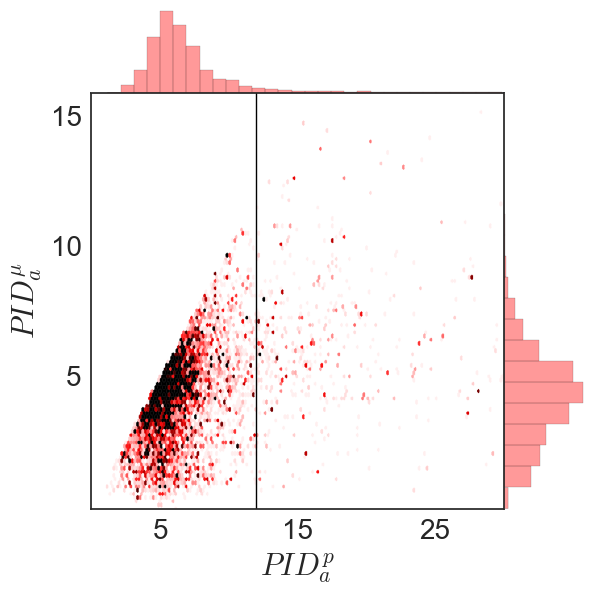

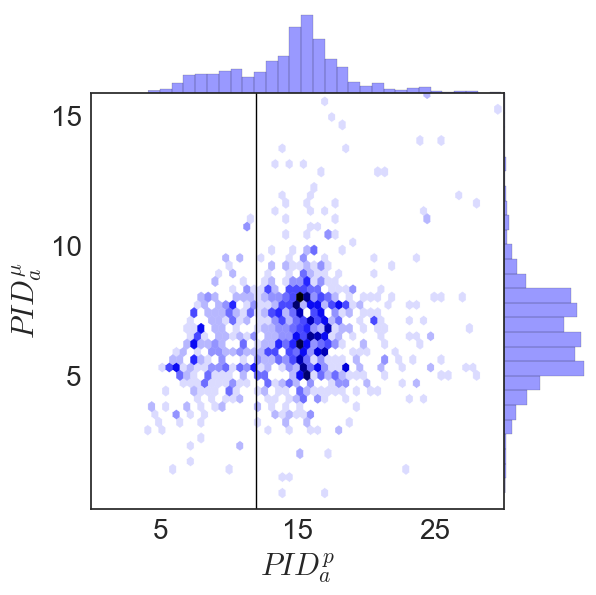

In [16]:
PIDaCut = 12
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)): 
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    sample = sample[sample['PIDa_assigned_proton']<30]    
    g = sns.jointplot(sample['PIDa_assigned_proton'], sample['PIDa_assigned_muon']
                      ,space=0
                      ,stat_func=None
                      ,kind="hex"                      
                      ,bins=np.linspace(0,30,30)
                      ,gridsize=150 if i==0 else 50
                      ,xlim=(0,30)
                      ,ylim=(0,16)
                      ,color=color                       
                      ,marginal_kws={'color':color,'bins':30})
    g.set_axis_labels('$PID_{a}^{p}$','$PID_{a}^{\\mu}$')
    g.ax_joint.set_xticks([5,15,25]); g.ax_joint.set_yticks([5,10,15])
    g.ax_joint.plot([PIDaCut,PIDaCut],g.ax_joint.get_ylim(),'-',color='black',linewidth=1)
    g.savefig(figures_path+'PIDa_mu_p_%d.pdf'%i)

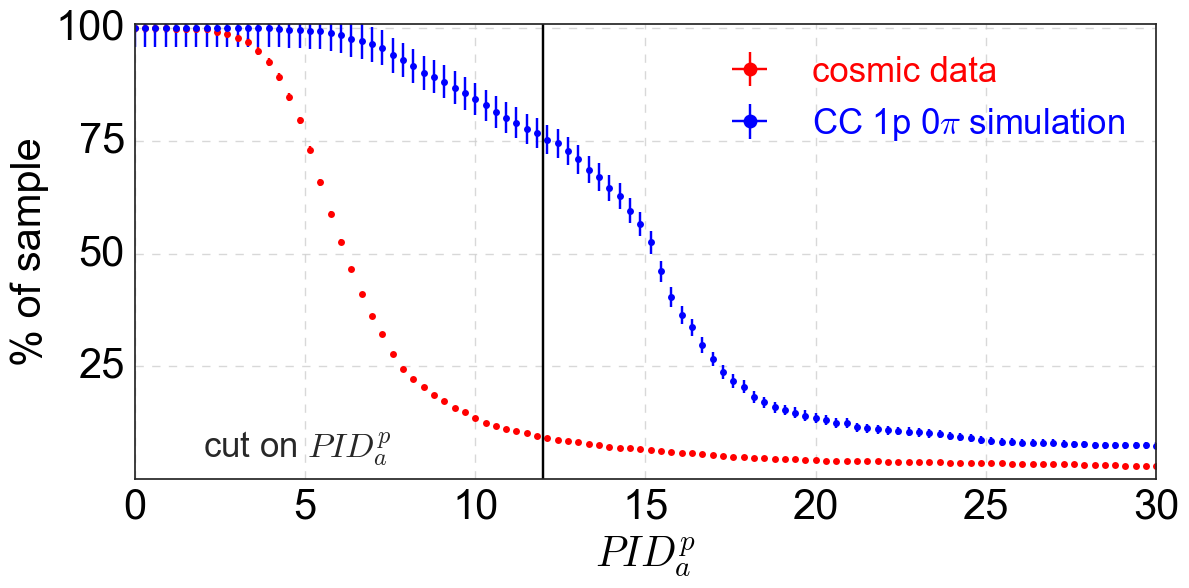

In [26]:
# impact of PIDa cut
ax,leg=plot_cut_samples(reduced_cut_name='no cut',markers_size=5,figsize=(12,6)
                        ,cut_var ='PIDa_assigned_proton'
                        ,do_add_legend=True
                        ,cut_type= 'min',fontsize=30
                        ,x_label = r'$PID_{a}^{p}$'
                        ,xmin=0, xmax=30 , Nbins=100
                        ,legend_loc='upper right')
plt.text(2,5,r'cut on $PID_{a}^{p}$',fontsize=25)
plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'PIDa_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

# length

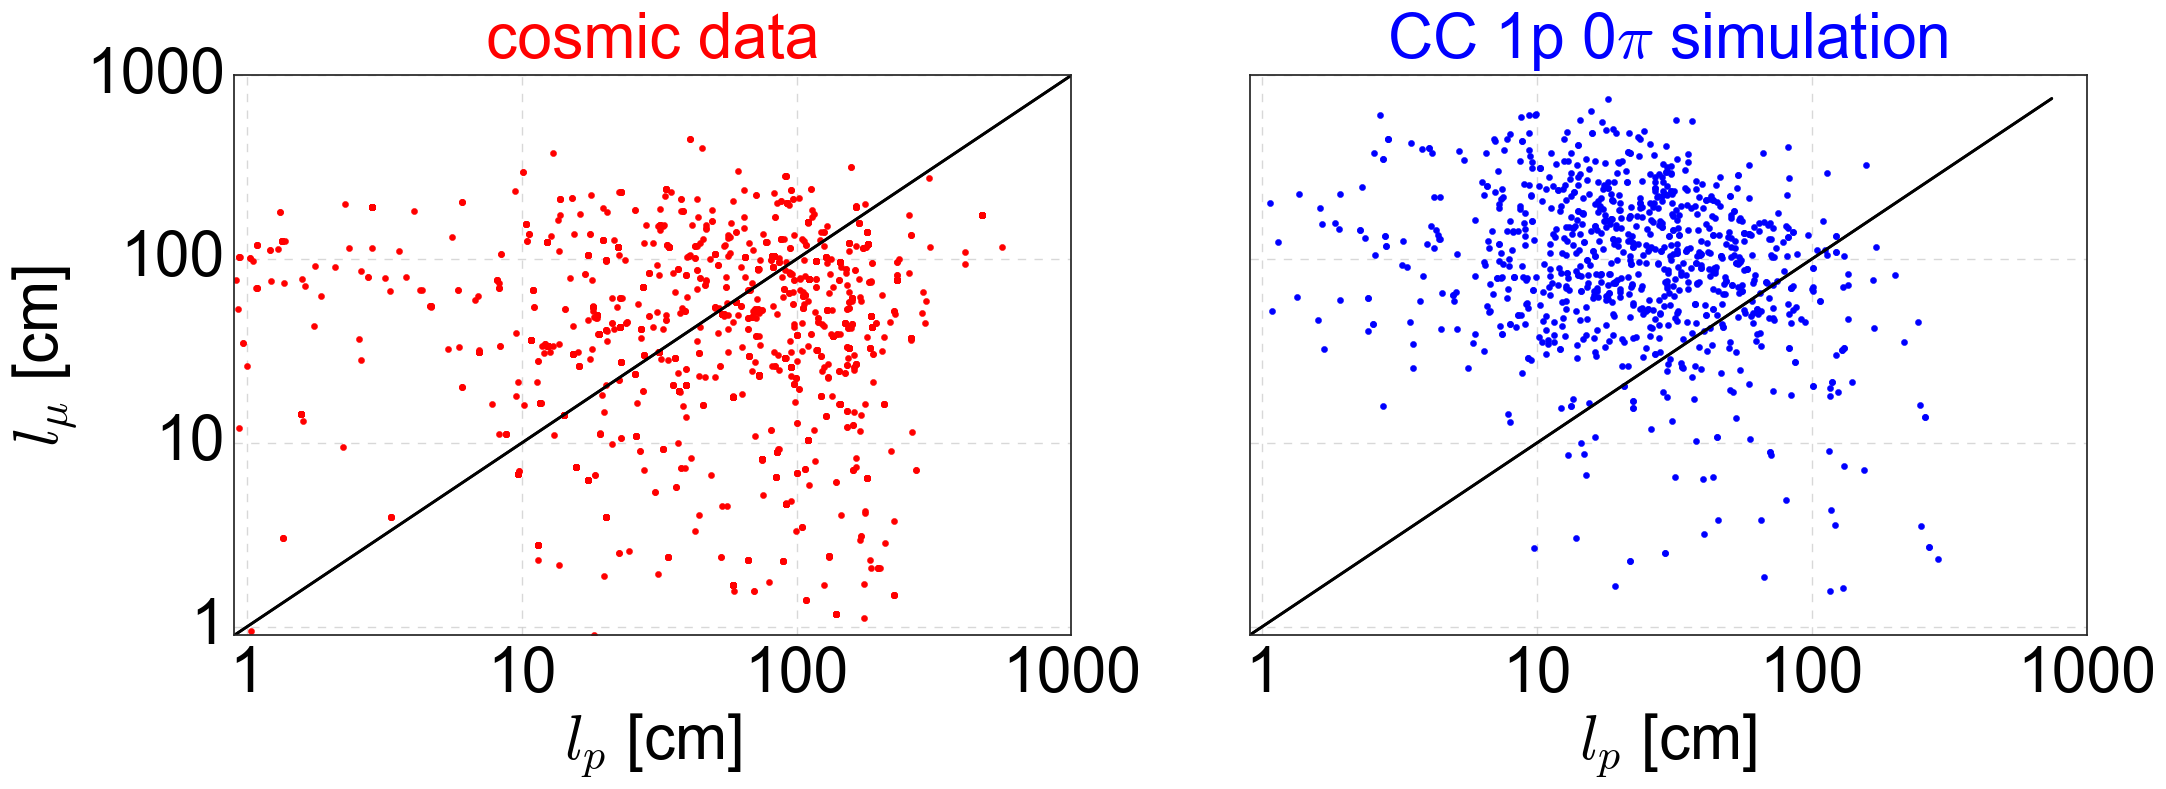

In [41]:
fig = plt.figure(figsize=(22,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label=r'$l_{p}$ [cm]',r'$l_{\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    sample = reduced_MCbnbDATAcosmicSamples['PIDa'][pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_assigned_proton'], sample['l_assigned_muon'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_assigned_muon'])],[0,np.max(sample['l_assigned_muon'])],'-',color='black',linewidth=2)
    plt.plot([0,np.max(sample['l_assigned_muon'])],[0,np.max(sample['l_assigned_muon'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,do_add_grid=True)    
    ax.xaxis.set_ticks([1,10,100,1000])
    ax.yaxis.set_ticks([1,10,100,1000])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.subplots_adjust(right=0.5)
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_after_cut_PIDa.pdf')

# non collinearity

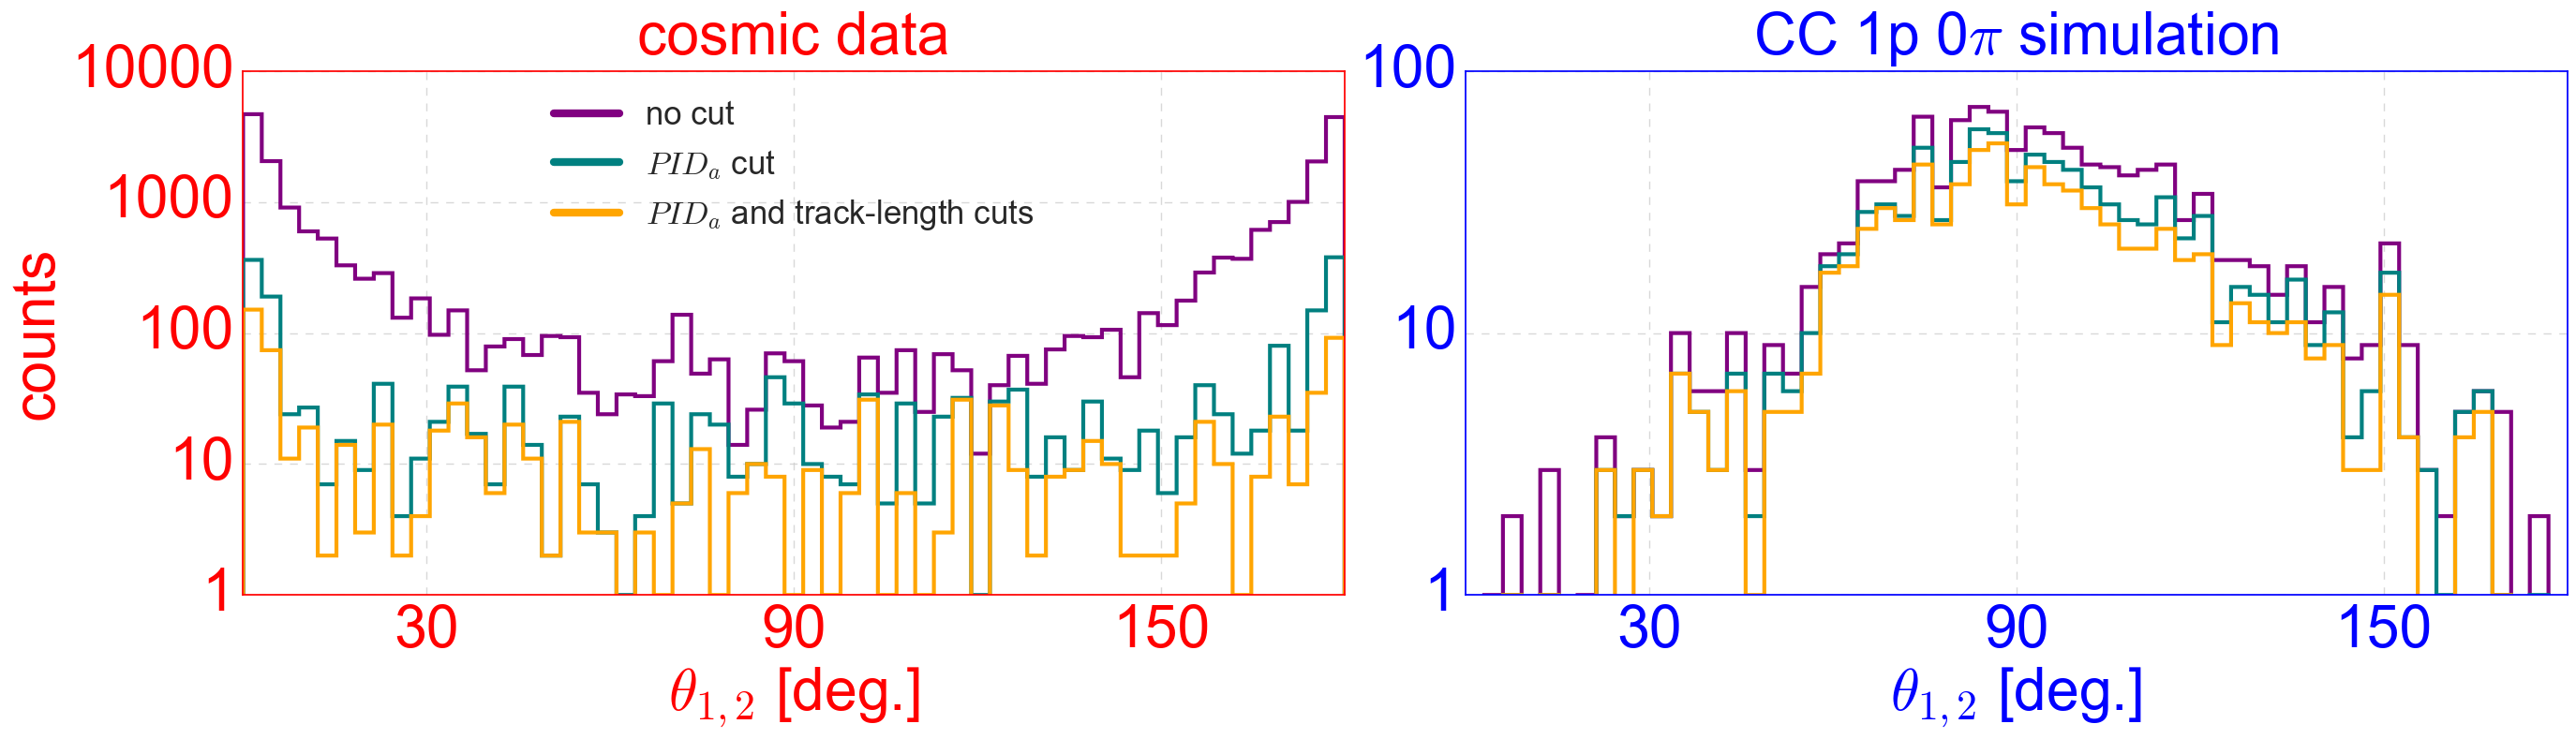

In [37]:
fig = plt.figure(figsize=(28,8))
bins=np.linspace(0,180,60)
x_label=r'$\theta_{1,2}$ [deg.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)    
    set_axes(ax,x_label=x_label, y_label='counts' if i==0 else '',fontsize=45
             ,xticks=[30,90,150],yticks=[10,100,1000],ticks_color=color,do_add_grid=True) 
    # change frame color
    for spine in ax.spines.values(): spine.set_edgecolor(color) 
    for cut_name,s_color,s_label in zip(['no cut','PIDa','length'] 
                                        ,['purple','teal','orange']
                                        ,['no cut','$PID_a$ cut','$PID_a$ and track-length cuts']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        theta = sample['theta_12'] 
        plt.hist(theta,bins=bins,color=s_color,histtype='step',linewidth=3) #,normed=1
        p = plt.plot([0,0], label=s_label,linestyle='-',linewidth=6,color=s_color)        
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i==0: ax.legend(fontsize=25,loc='upper center')    
plt.subplots_adjust(right=0.5)
plt.tight_layout()
fig.savefig(figures_path+'theta_12_before_after_cuts_PIDa_length.pdf')

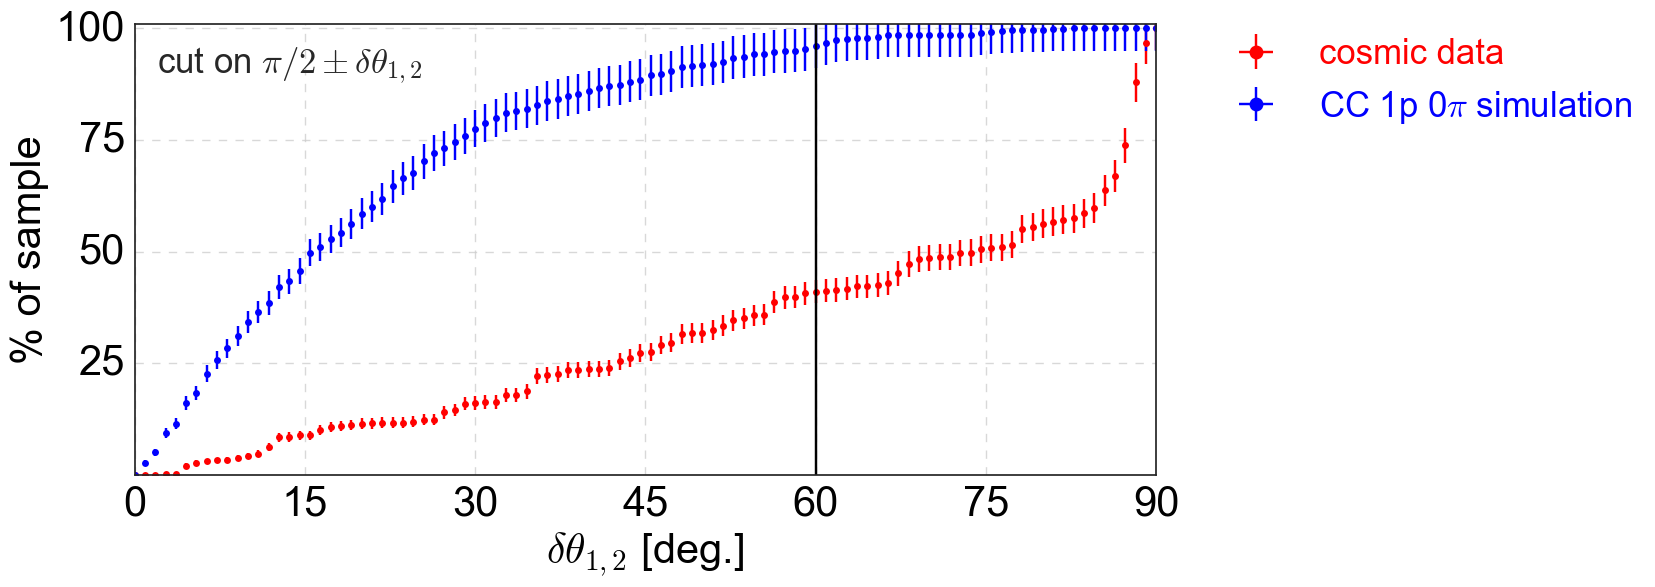

In [36]:
# after cuts on PIDa and tracks-length
ax,leg=plot_cut_samples(reduced_cut_name='length',markers_size=5
                        ,cut_var ='theta_12'
                        ,do_add_legend=True
                        ,cut_type= 'symmetric',fontsize=30,figsize=(12,6)
                        ,x_label = r'$\delta \theta_{1,2}$ [deg.]'
                        ,xcenter=90, xmin=0., xmax=90 , Nbins=100, legend_loc='bbox')
plt.text(2,90,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
plt.plot([60,60],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'theta_12_cuts_after_cuts_PIDa_length.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

# $\Delta \phi$

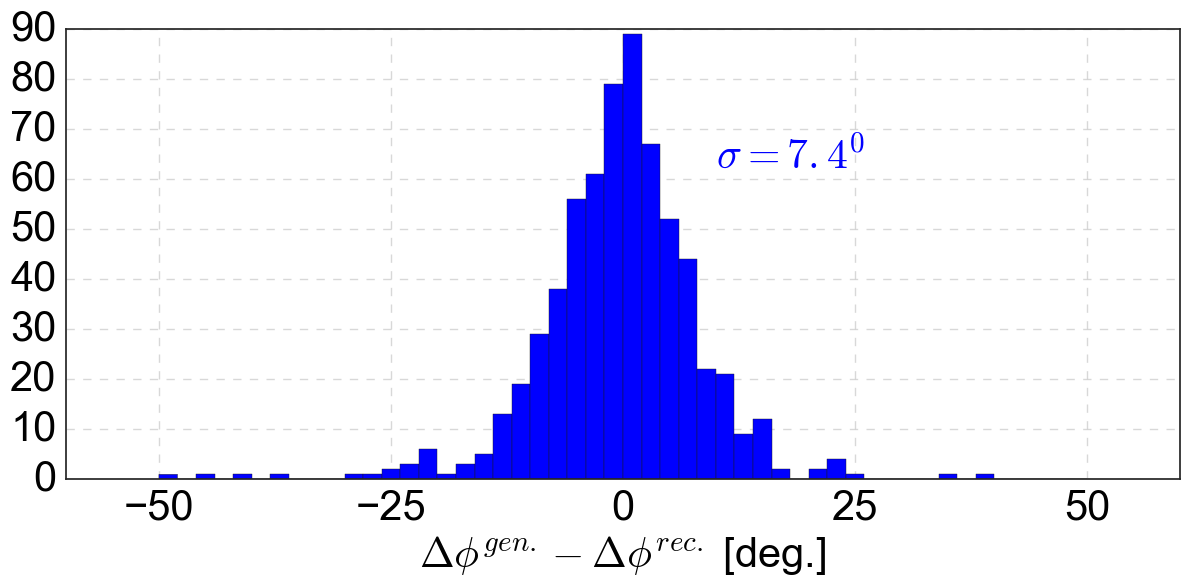

In [53]:
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pair_types[1]; label = labels[1]; color = colors[1]
sample = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-50,50,51),color=color);
set_axes(ax,r'$\Delta \phi^{gen.}-\Delta \phi^{rec.}$ [deg.]' , '', fontsize=30,do_add_grid=True
             ,xticks=[-50,-25,0,25,50])
small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<25]
sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco_after_RdQ_cut.pdf')

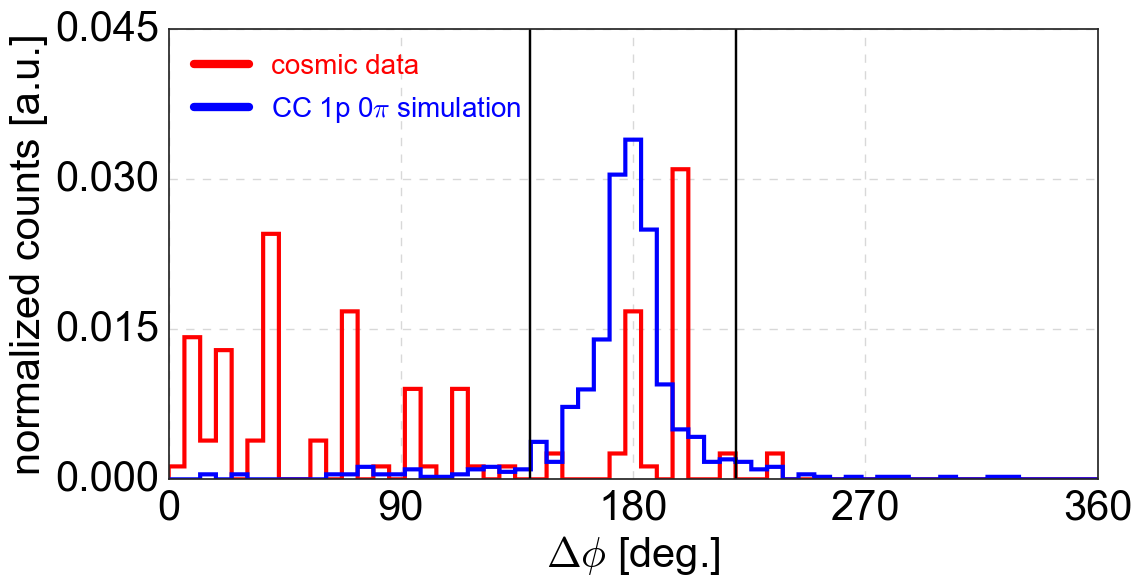

In [60]:
ax=plot_feature_pairs(cut_name='vertex activity'
                   ,var='delta_phi',x_label=r'$\Delta \phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                   ,bins=np.linspace(0,360,60),figsize=(12,6),ticks_color='black',fontsize=30,legend_fontsize=20)
plt.plot([140,140],[0,0.05],'-',color='black')
plt.plot([220,220],[0,0.05],'-',color='black')
ax.set_yticks([0,0.015,0.03,0.045])
plt.savefig(figures_path+'DeltaPhi_after_RdQ_cut.pdf')

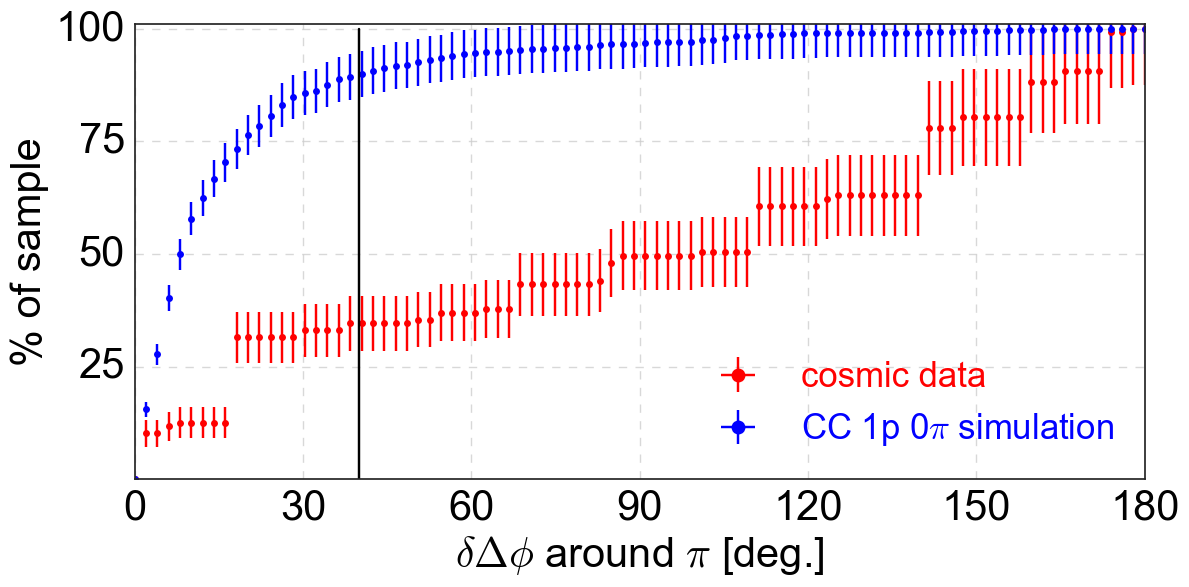

In [61]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity',do_add_legend=True,markers_size=5,legend_loc='lower right',
                     cut_var ='delta_phi',cut_type= 'symmetric'
                        ,x_label = r'$\delta \Delta \phi$ around $\pi$ [deg.]'
                        ,ticks_color='black',
                     xcenter=180, xmin=0., xmax=180 , Nbins=90,fontsize=30,figsize=(12,6))
plt.plot([40,40],[0,100],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts_after_RdQ_cut.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

# $p_t$

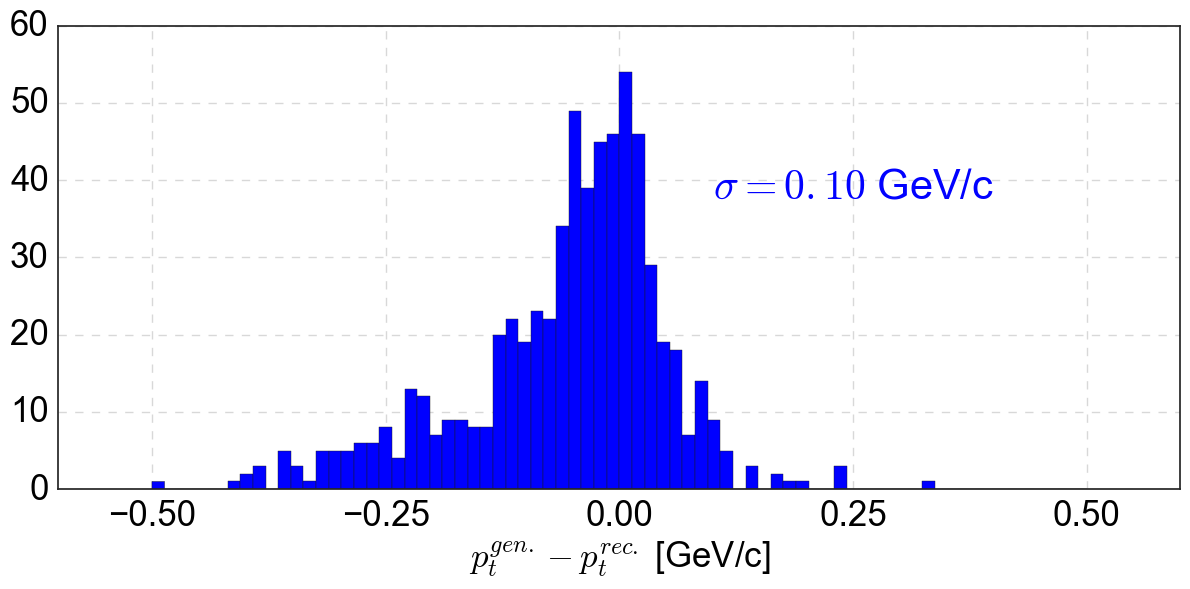

In [62]:
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pair_types[1]; label = labels[1]; color = colors[1]
sample = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
h,bins,_=ax.hist(sample['truth_Pt']-sample['reco_Pt'],bins=np.linspace(-0.5,0.5,75),color=color); 
set_axes(ax,r'$p_{t}^{gen.}-p_{t}^{rec.}$ [GeV/c]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-0.50,-0.25,0,0.25,0.50])
small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<0.35]
sigma = np.std(small_sample['truth_Pt']-small_sample['reco_Pt'])
plt.text(0.1,0.7*np.max(h),'$\\sigma=%.2f$'%sigma+' GeV/c',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco_after_RdQ_cut.pdf')

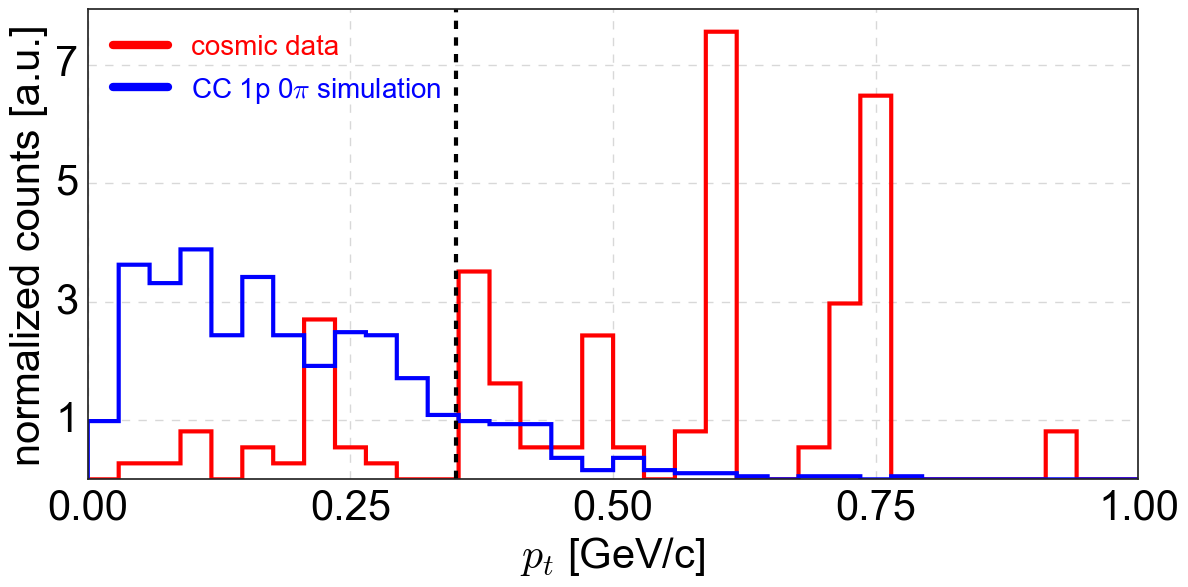

In [69]:
ax=plot_feature_pairs(cut_name='vertex activity',var='reco_Pt',x_label=r'$p_{t}$ [GeV/c]'                              
                      ,bins=np.linspace(0,1,35)                              
                      ,do_add_legend=True
                      ,figsize=(12,6),ticks_color='black',fontsize=30,legend_fontsize=20,legend_loc='upper left')
ax.plot([0.35,0.35],ax.get_ylim(),'--',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.set_yticks([1,3,5,7])
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_RdQ_cut.pdf')

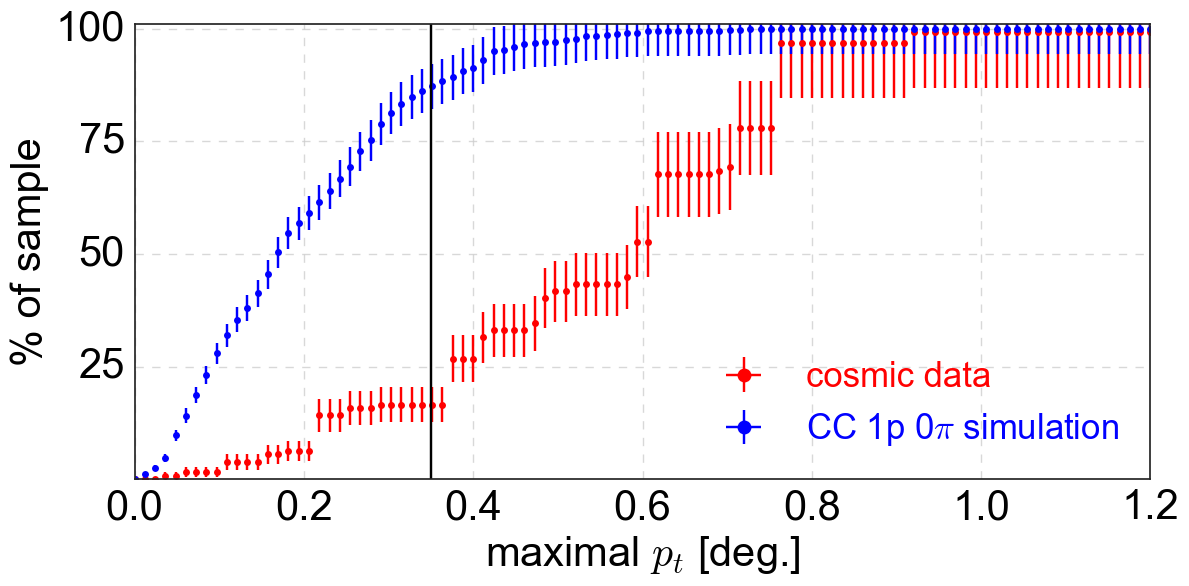

In [70]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity',do_add_legend=True,legend_loc='lower right'
                        ,legend_fontsize=25,markers_size=5                
                     ,cut_var ='reco_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1.2 , Nbins=100,fontsize=30,figsize=(12,6));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts_after_RdQ_cut.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

In [7]:
# ------------------------------------------------
def sample_in_FV(sample=None, max_FV_y = 110, # 115 in pandoraNu tracks collection
                 min_FV_z = 5, max_FV_z = 1037,
                 min_FV_x = 3, max_FV_x = 250): # 257
    sample_in_FV = sample[ 
                              (np.abs(sample['starty_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['starty_assigned_proton']) < max_FV_y)
                            & (np.abs(sample['endy_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['endy_assigned_proton']) < max_FV_y)
                            
                            & ((sample['startz_assigned_muon'] > min_FV_z) & (sample['startz_assigned_muon'] < max_FV_z) )
                            & ((sample['startz_assigned_proton'] > min_FV_z) & (sample['startz_assigned_proton'] < max_FV_z) )                            
                            & ((sample['endz_assigned_muon'] > min_FV_z) & (sample['endz_assigned_muon'] < max_FV_z) )
                            & ((sample['endz_assigned_proton'] > min_FV_z) & (sample['endz_assigned_proton'] < max_FV_z) )

                            & ((sample['startx_assigned_muon'] > min_FV_x) & (sample['startx_assigned_muon'] < max_FV_x) )
                            & ((sample['startx_assigned_proton'] > min_FV_x) & (sample['startx_assigned_proton'] < max_FV_x) )                            
                            & ((sample['endx_assigned_muon'] > min_FV_x) & (sample['endx_assigned_muon'] < max_FV_x) )
                            & ((sample['endx_assigned_proton'] > min_FV_x) & (sample['endx_assigned_proton'] < max_FV_x) )
                           ]
    return sample_in_FV
# ------------------------------------------------

In [32]:
#---------------------------------------------------------------------------------------------
# Aug-1, 2017
def plot_feature_pairs(cut_name='${PID}_a$',
                       var='l_long',x_label='$l_{long}$ [cm]',mul=1,                                
                       bins=np.linspace(0,300,50),
                       figsize=(12,8),legend_fontsize=25,fontsize=25,
                       do_add_legend=False,legend_loc='upper center', 
                       ticks_color='black'):
    fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    text_colors=[]
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
        sample = reduced_samples[cut_name][pair_type]
        if len(sample) < 10: continue
        h,bins,_=plt.hist(mul*sample[var],normed=1,bins=bins,histtype='step',linewidth=3,color=color)
        text_colors.append(color)
        p = plt.plot([0,0],[0,0], label=label,linestyle='-',linewidth=6,color=color)
        if np.max(h)>max_h:
            max_h=np.max(h)
        
    if do_add_legend:
        leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc)
        for text_color,text in zip(text_colors,leg.get_texts()):
            text.set_color(text_color)

    set_axes(ax,x_label=x_label,y_label='normalized counts [a.u.]',fontsize=fontsize,ticks_color=ticks_color,do_add_grid=True)
    ax.set_xlim(np.min(bins),np.max(bins))
    ax.set_ylim(0,1.05*max_h)
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
#     ax.yaxis.set_major_formatter(ticker.NullFormatter())
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------




# pairs of 2-tracks at close proximity

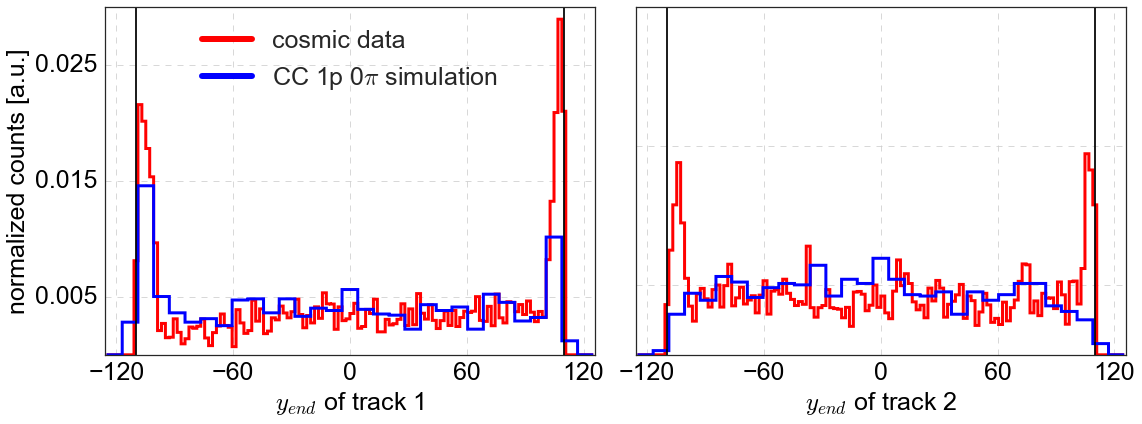

In [6]:
fig = plt.figure(figsize=(16,6))
bins=np.linspace(-125,125,64)
for i,(var,x_label) in enumerate(zip(['endy_assigned_muon','endy_assigned_proton']
                                     ,['$y_{end}$ of track 1','$y_{end}$ of track 2'])):
    ax = fig.add_subplot(1,2,i+1)
    for pair_type,label,color in zip(pair_types,labels,colors):
        sam = MCbnbDATAcosmicSamples[pair_type]
        plt.hist( sam[var] , histtype='step', linewidth=3 , color=color 
                 , bins= (np.linspace(-125,125,125) if pair_type=='cosmic' else np.linspace(-125,125,32))
                 , normed=1)
        plt.plot( [0,0],[0,0], linewidth=6 , color=color , label=label)
    if i==0: plt.legend(fontsize=25,loc='upper center')
    set_axes(ax,x_label,'normalized counts [a.u.]' if i==0 else ''
             ,xticks=[-120,-60,0,60,120],xlim=(-126,126)
             ,yticks=[0.005,0.015,0.025]#,ylim=(0,0.03)
             ,do_add_grid=True) 
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())
    plt.plot([110,110],ax.get_ylim(),'-',color='black')
    plt.plot([-110,-110],ax.get_ylim(),'-',color='black')

plt.tight_layout()
plt.savefig(figures_path+'y_position.pdf')

# what is the distance between the µ and the p?

100.0 %


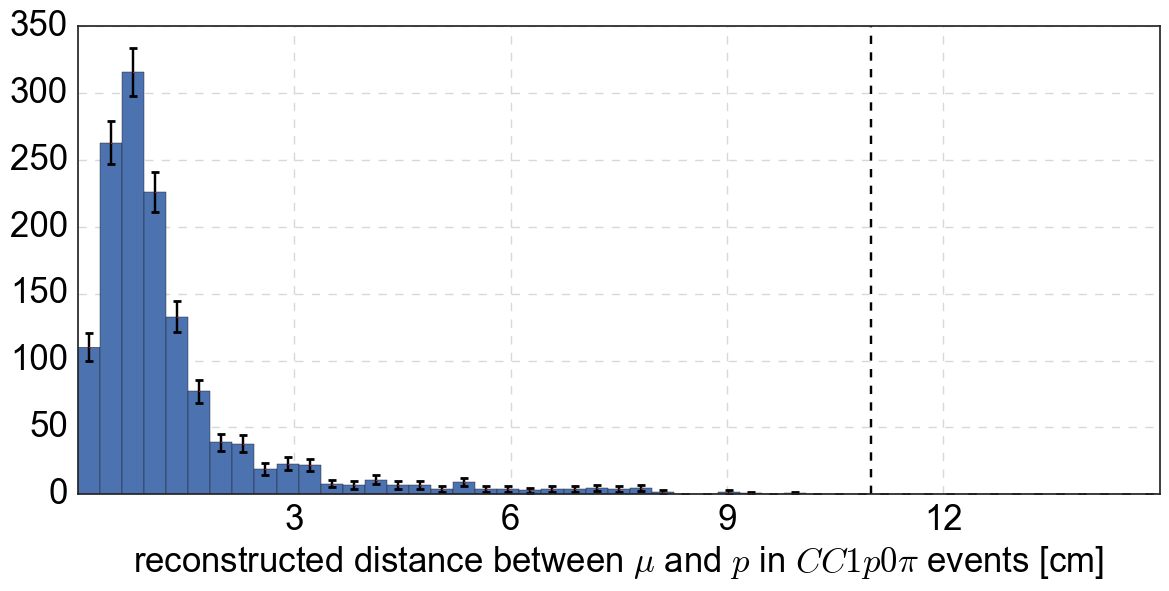

In [8]:
x = samples['CC 1p 0pi']['distance']
fig,ax=plt.subplots(figsize=(12,6))
h,bins,_=ax.hist(x,bins=np.linspace(0,15,50)) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
set_axes(ax,'reconstructed distance between $\\mu$ and $p$ in $CC1p0\\pi$ events [cm]' 
         , '', fontsize=25 ,xticks=[3,6,9,12])
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
# ax.set_yscale('log')
plt.savefig(figures_path+'mup_distance.pdf')
# how many of the µp pairs are retained for a cut < 11 cm?
print 100.*float(len(samples['CC 1p 0pi'][samples['CC 1p 0pi']['distance']<11]))/len(samples['CC 1p 0pi']),'%'

# cuts

In [9]:
def get_pur_eff_cut(cut_name = '${PID}_A$' , reduced = dict()):
    global pur_eff
    Noriginal , Nreducted , freducted = dict() , dict() , dict()
    for pair_type in pair_types:
        sam = samples[pair_type]
        Noriginal[pair_type] = len(samples[pair_type])
        Nreducted[pair_type] = float(len(reduced[pair_type]))
        freducted[pair_type] = 100.0 * Nreducted[pair_type]/Noriginal[pair_type]
    Nreducted['all'] = Nreducted['CC 1p 0pi'] + Nreducted['cosmic']
    pur_eff_cut = pd.DataFrame({'CC$0\pi 1 p$ eff.':'%.1f'%freducted['CC 1p 0pi']+'%'
                               ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreducted['CC 1p 0pi']/Nreducted['all'] if Nreducted['all']>0 else 0)+'%'}
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pur_eff_cut[pair_type] = '%.1f'%freducted[pair_type]+'%' +' (%.0f)'%Nreducted[pair_type]
    pur_eff = pur_eff.append(pur_eff_cut)
    reduced_samples[cut_name] = reduced    
# -- - - - --- - - -- - - --  - - ---- - -- - -- -- -- -- - - - - -- --     
reduced_samples=dict(dict())
pur_eff = pd.DataFrame()
reduced = dict()
for pair_type in pair_types: reduced[pair_type] = samples[pair_type]
reduced_samples['no cut'] = reduced
# before cuts
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['no cut'][pair_type]
    reduced[pair_type] = sam
get_pur_eff_cut(cut_name = 'no FV', reduced = reduced)

# cut 0: FV
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['no FV'][pair_type]
    reduced[pair_type] = sample_in_FV(sam)
get_pur_eff_cut(cut_name = 'FV', reduced = reduced)



# cut 1: PIDa
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['FV'][pair_type]
#     reduced[pair_type] = sam[sam['PIDa_assigned_proton']>8] # for art files analysis
    reduced[pair_type] = sam[sam['PIDA_assigned_proton']>8]
get_pur_eff_cut(cut_name = '${PID}_a$', reduced = reduced)


# cut 2.5: require that the longer track is the one with larger PIDa
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['${PID}_a$'][pair_type]
    reduced[pair_type] = sam[sam['PIDA_long'] < sam['PIDA_short']]
#     reduced[pair_type] = sam[sam['PIDa_long'] < sam['PIDa_short']] # for art files analysis
get_pur_eff_cut(cut_name = '$l_{\\mu}>l_{p}$', reduced = reduced)



# cut 3: |\theta_{1,2}-90^0|<60^0$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$l_{\\mu}>l_{p}$'][pair_type]
#     reduced[pair_type] = sam[np.abs(sam['theta_12']-90)<60] # for art files analysis
    reduced[pair_type] = sam[np.abs(180./np.pi*sam['2_tracks_angle']-90)<60]
get_pur_eff_cut(cut_name = '$|\theta_{1,2}-90^0|<60^0$', reduced = reduced)


# cut 5: $\Delta phi$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    reduced[pair_type] = sam[np.abs(sam['delta_phi']-180.000)<40]
get_pur_eff_cut(cut_name = '$|\Delta \phi - \pi|<40^{0}$', reduced = reduced)

# cut 6: $p_{t}<0.25$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.25]
get_pur_eff_cut(cut_name = '$p_{t}<0.25$', reduced = reduced)


# cut 5+6: $\Delta phi$ & $p_{t}<0.25$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.25]
get_pur_eff_cut(cut_name = '$p_{t}<0.25$ & $|\Delta \phi - \pi|<40^{0}$', reduced = reduced)


pur_eff

,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,cosmic,CC 1p 0pi
no FV,100.0%,3.9%,100.0% (33294),100.0% (1358)
FV,64.3%,4.3%,58.0% (19322),64.3% (873)
${PID}_a$,60.5%,15.1%,13.8% (4611),60.5% (822)
$l_{\mu}>l_{p}$,50.6%,27.4%,5.5% (1824),50.6% (687)
"$|\theta_{1,2}-90^0|<60^0$",48.6%,57.9%,1.4% (479),48.6% (660)
$|\Delta \phi - \pi|<40^{0}$,42.9%,86.9%,0.3% (88),42.9% (583)
$p_{t}<0.25$,34.5%,84.0%,0.3% (89),34.5% (468)
$p_{t}<0.25$ & $|\Delta \phi - \pi|<40^{0}$,32.6%,90.6%,0.1% (46),32.6% (443)


## \Delta \phi